In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p
import sympy
import math
import random
from scipy.interpolate import interp1d, lagrange


In [3]:
def getRandomPoints(x_, y_, rand=0.7):
    """
    Goal:
        produce a subset of points from 2 arrays representing the x and y values of a function
    Inputs:
        x_ - an array of x values
        y_ - an array of y values
        rand - how many random values to select
    Output:
        x_, y_ - a subset of x and y values
    Note: 
        the first x value and last x value, that is the end points of the x interval [a,b] must be included in the random set
        for the interpolation function to work properly in the region [a,b]
    """

    random.seed()
    x_rand = []
    y_rand = []
    for i in range(len(x_)):
        if (i == 0 or i == len(x_) - 1 or random.random()>rand):
            x_rand.append(x_[i])
            y_rand.append(y_[i])
    
    return [x_rand, y_rand]

def calculateError(y_, y_pred):
    """
    Goal: given a predicted function find the RSS and the r^2 values to gauge accuracy of your model
    Inputs:
        y_      - "true" y values
        y_pred  - predicted y values
    Output:
        RSS -   residual sum squared
        r^2 -   ration of explained sum of squares to total sum squared (i.e. 1 - RSS/TSS)
    """
    RSS = 0
    TSS = 0
    y_mean = np.mean(y_)
    for i in range(len(y_)):
        RSS += (y_pred[i] - y_[i])**2
        TSS += (y_pred[i] - y_mean)**2
    
    return (1 - RSS/TSS)

## Create Function Data

In [61]:
#Define the interval of interest
x_vals = np.linspace(0.1,3,100)

#Choose noise
noise = 0.7

#Quadratic Function with noise
y_quad = [x**2 + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]

#Logarithmic Function with noise
y_log = [math.log(x) + random.random()*noise*(-1)**random.randrange(1,2) for x in x_vals]

## Choose Some Random points

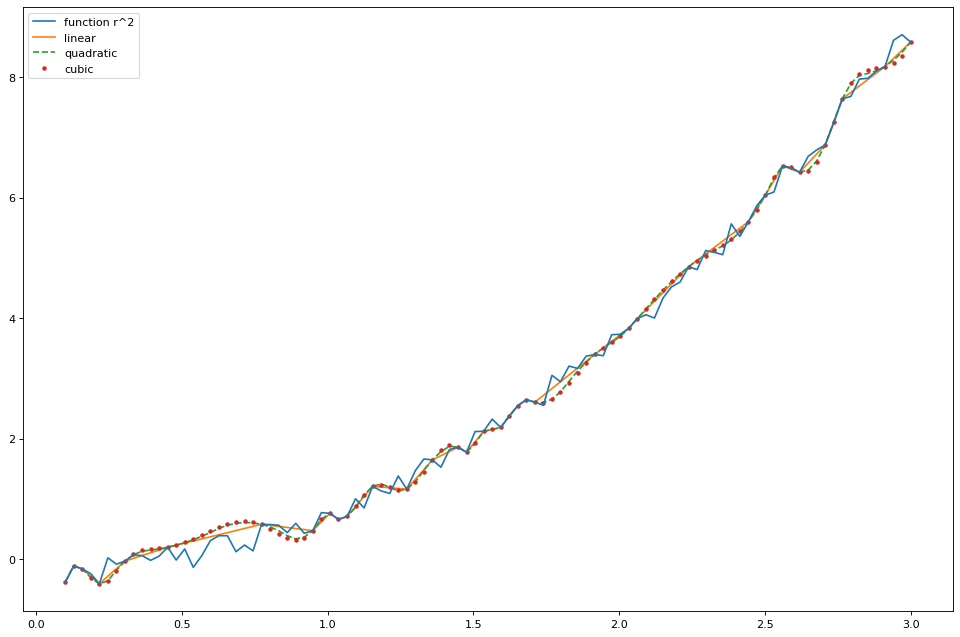

In [57]:
x_rand, y_rand = getRandomPoints(x_vals, y_quad)

#Apply linear, quadratic and cubic interpolation
f1 = interp1d(x_rand, y_rand, kind='linear')(x_vals)
f2 = interp1d(x_rand, y_rand, kind='quadratic')(x_vals)
f3 = interp1d(x_rand, y_rand, kind='cubic')(x_vals)

#Calculate r^2 error
r_lin = calculateError(y_quad, f1)
r_quad = calculateError(y_quad, f2)
r_cube = calculateError(y_quad, f3)

plt.figure(figsize=(15, 10), dpi=80)
plt.plot(x_vals, y_quad, zorder=20, label='y=x^2')
plt.plot(x_vals, f1, '-')
plt.plot(x_vals, f2, '--')
plt.plot(x_vals, f3, '.')
plt.legend(['function r^2' , 'linear', 'quadratic', 'cubic'], loc='best')
plt.show()

In [58]:
print("Linear r^2: ", r_lin)
print("Quadratic r^2: ", r_quad)
print("Cubic r^2: ", r_cube)

Linear r^2:  (710.5890724704961, 0.9975417203846658)
Quadratic r^2:  (711.0484461963794, 0.9962487329777836)
Cubic r^2:  (710.8226985490154, 0.9958469109482468)


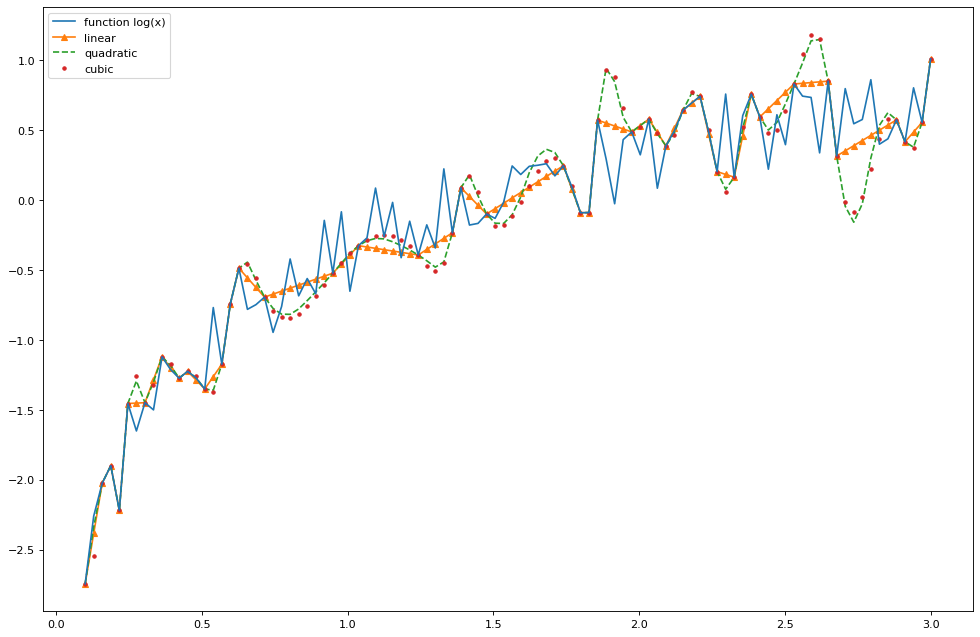

In [65]:
x_rand, y_rand = getRandomPoints(x_vals, y_log)

#Apply linear, quadratic and cubic interpolation
f1 = interp1d(x_rand, y_rand, kind='linear')(x_vals)
f2 = interp1d(x_rand, y_rand, kind='quadratic')(x_vals)
f3 = interp1d(x_rand, y_rand, kind='cubic')(x_vals)

#Calculate r^2 error
r_lin = calculateError(y_log, f1)
r_quad = calculateError(y_log, f2)
r_cube = calculateError(y_log, f3)

plt.figure(figsize=(15, 10), dpi=80)
plt.plot(x_vals, y_log, zorder=20, label='y=x^2')
plt.plot(x_vals, f1, '-^')
plt.plot(x_vals, f2, '--')
plt.plot(x_vals, f3, '.')
plt.legend(['function log(x)' , 'linear', 'quadratic', 'cubic'], loc='best')
plt.show()

In [66]:
print("Linear r^2: ", r_lin)
print("Quadratic r^2: ", r_quad)
print("Cubic r^2: ", r_cube)

Linear r^2:  (64.28794377642356, 0.9403225118122608)
Quadratic r^2:  (66.85012794277797, 0.887509793580948)
Cubic r^2:  (67.71874467381303, 0.8861682491330578)
